# Multiple Linear Regression
- Multiple Linear Regression (MLR) is a statistical technique used to model the relationship between one dependent variable and two or more independent variables.
- It extends simple linear regression by allowing for multiple predictors, enabling a more comprehensive analysis of how various factors influence the outcome.
- The general form of the MLR equation is:
  
  Y = β0 + β1X1 + β2X2 + ... + βnXn + ε
  
  Where:
  - Y is the dependent variable.
  - β0 is the y-intercept (constant term).
  - β1, β2, ..., βn are the coefficients for each independent variable (X1, X2, ..., Xn).
  - ε is the error term.
- MLR is commonly used in various fields such as economics, social sciences, and business to understand the impact of multiple factors on a single outcome.
- Assumptions of MLR include linearity, independence of errors, homoscedasticity (constant variance of errors), and normality of error terms.
- Model evaluation metrics for MLR include R-squared, adjusted R-squared, F-statistic, and p-values for individual predictors to assess their significance.
- MLR can be implemented using statistical software and programming languages such as R, Python (with libraries like statsmodels and scikit-learn), and SPSS.
- Example applications of MLR:
  - Predicting house prices based on features like size, location, and number of bedrooms.
  - Analyzing the effect of marketing spend, product quality, and customer service on sales revenue.
  - Studying the impact of various demographic factors on health outcomes.
  - Forecasting employee performance based on experience, education level, and training hours.
  - Evaluating the influence of environmental factors on crop yield in agriculture.
- Steps to perform MLR:
  - 1. Data Collection: Gather data for the dependent and independent variables.
  - 2. Data Preprocessing: Clean the data, handle missing values, and encode categorical variables if necessary.
  - 3. Exploratory Data Analysis: Visualize relationships between variables and check for multicollinearity.
  - 4. Model Building: Fit the MLR model using statistical software.
  - 5. Model Evaluation: Assess the model's performance using appropriate metrics.
  - 6. Interpretation: Analyze the coefficients to understand the impact of each independent variable on the dependent variable.
  - 7. Prediction: Use the model to make predictions on new data.
  - 8. Validation: Validate the model using techniques like cross-validation to ensure its robustness.
  - 9. Reporting: Summarize findings and insights derived from the model for stakeholders.
  - 10. Refinement: Iterate on the model by adding or removing variables, transforming variables, or using different modeling techniques as needed.
  - 11. Deployment: Implement the model in a real-world application for ongoing predictions and analysis.
- Challenges in MLR:
  - 1. Multicollinearity: High correlation between independent variables can distort the estimates of coefficients.
  - 2. Overfitting: Including too many predictors can lead to a model that performs well on training data but poorly on new data.
  - 3. Outliers: Extreme values can disproportionately influence the regression results.
  - 4. Non-linearity: If the relationship between variables is not linear, MLR may not be appropriate without transformations.
  - 5. Data Quality: Inaccurate or incomplete data can lead to misleading results.
  - 6. Interpretation: Understanding the practical significance of coefficients can be challenging, especially with many predictors.
  - 7. Assumption Violations: Violating MLR assumptions can lead to unreliable estimates and inferences.
  - 8. Model Complexity: Balancing model complexity with interpretability can be difficult, especially in fields requiring clear explanations.
  - 9. Sample Size: Insufficient data can lead to unreliable estimates and reduced statistical power.
  - 10. Computational Resources: Large datasets with many predictors may require significant computational power for model fitting and evaluation.
- Despite these challenges, MLR remains a powerful tool for understanding complex relationships in data and making informed decisions based on multiple factors.
- With careful consideration of its assumptions and limitations, MLR can provide valuable insights across various domains.
- By leveraging advancements in statistical software and machine learning techniques, practitioners can enhance the effectiveness of MLR in their analyses.
- Overall, Multiple Linear Regression is a versatile and widely used method for modeling relationships in data, enabling researchers and analysts to uncover patterns and make predictions based on multiple influencing factors.

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [54]:
df_index = pd.read_csv('economic_index.csv')

In [55]:
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [56]:
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [57]:
df_index.drop(columns=['year', 'month'], axis=1, inplace=True)

In [58]:
df_index.head()

,Unnamed: 0,interest_rate,unemployment_rate,index_price
0,0,2.75,5.3,1464
1,1,2.50,5.3,1394
2,2,2.50,5.3,1357
3,3,2.50,5.3,1293
4,4,2.50,5.4,1256


In [59]:
## Check Null values
df_index.isnull().sum()

Unnamed: 0           0
interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

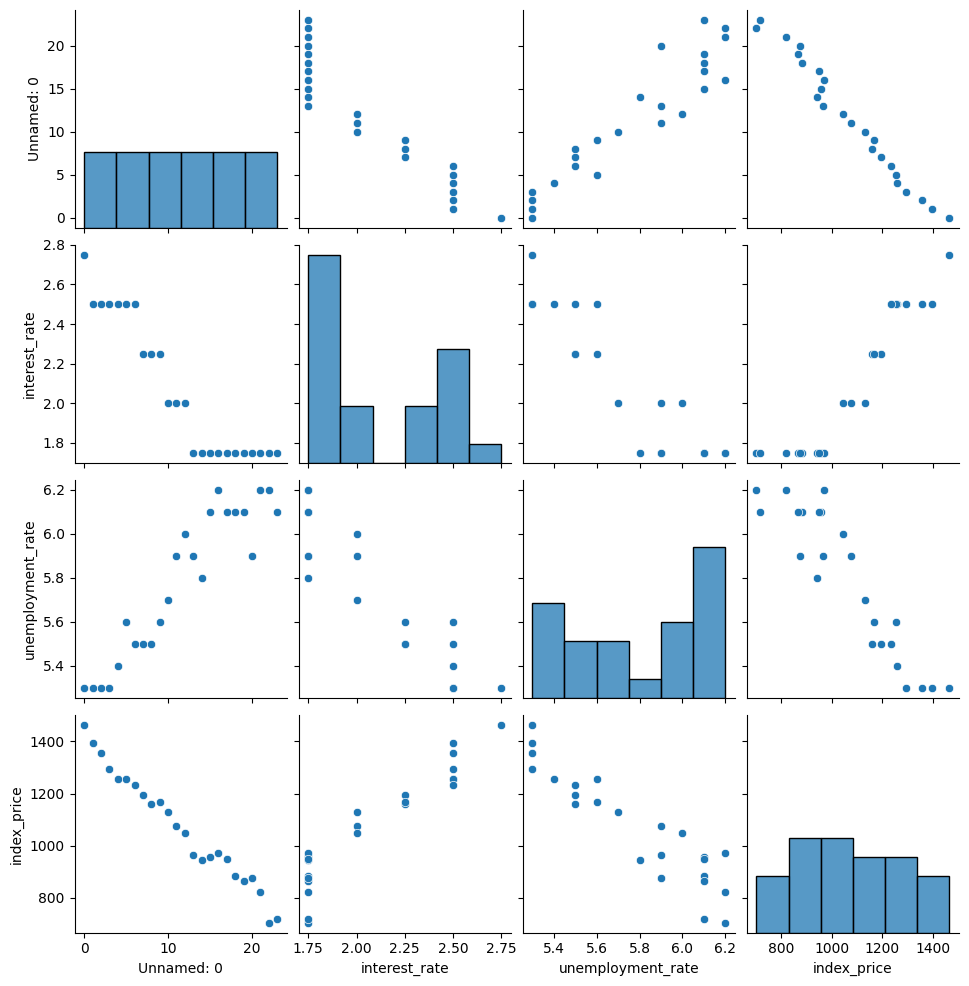

In [60]:
## Lets do some visualization
import seaborn as sns
sns.pairplot(df_index)

In [61]:
df_index.corr()

,Unnamed: 0,interest_rate,unemployment_rate,index_price
Unnamed: 0,1.000000,-0.934555,0.935300,-0.988246
interest_rate,-0.934555,1.000000,-0.925814,0.935793
unemployment_rate,0.935300,-0.925814,1.000000,-0.922338
index_price,-0.988246,0.935793,-0.922338,1.000000


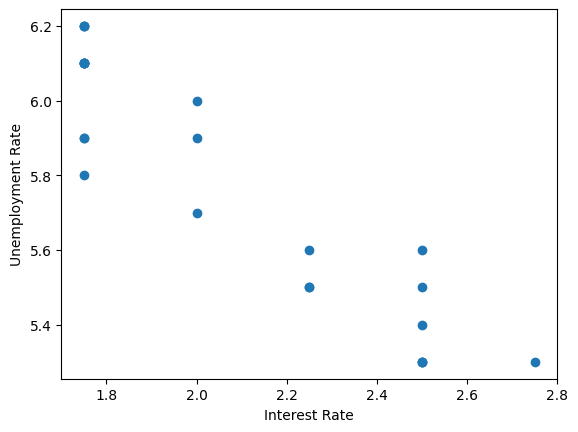

In [62]:
## Visualizing the data points more closely
plt.scatter(df_index['interest_rate'], df_index['unemployment_rate'])
plt.xlabel('Interest Rate')
plt.ylabel('Unemployment Rate')
plt.show()

In [63]:
## Independent and dependent features
X = df_index.iloc[:, :-1]
y = df_index.iloc[:, -1]

In [64]:
X.head()

,Unnamed: 0,interest_rate,unemployment_rate
0,0,2.75,5.3
1,1,2.50,5.3
2,2,2.50,5.3
3,3,2.50,5.3
4,4,2.50,5.4


In [65]:
y.head()

0    1464
1    1394
2    1357
3    1293
4    1256
Name: index_price, dtype: int64

In [66]:
## Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

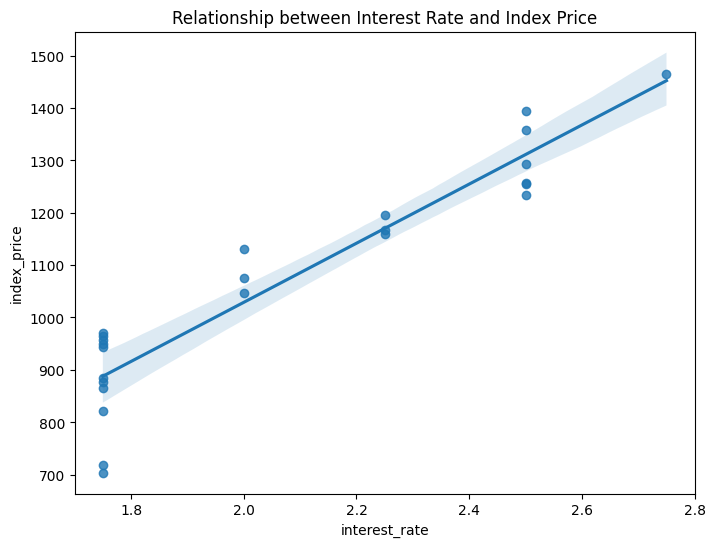

In [67]:
plt.figure(figsize=(8, 6))
sns.regplot(x=df_index['interest_rate'], y=df_index['index_price'])
plt.title('Relationship between Interest Rate and Index Price')
plt.show()

In [68]:
df_index.head()

,Unnamed: 0,interest_rate,unemployment_rate,index_price
0,0,2.75,5.3,1464
1,1,2.50,5.3,1394
2,2,2.50,5.3,1357
3,3,2.50,5.3,1293
4,4,2.50,5.4,1256


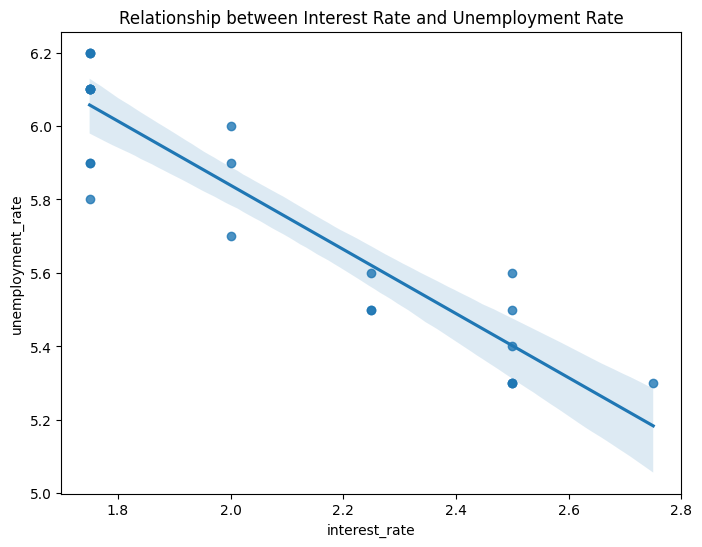

In [69]:
plt.figure(figsize=(8, 6))
sns.regplot(x=df_index['interest_rate'], y=df_index['unemployment_rate'])
plt.title('Relationship between Interest Rate and Unemployment Rate')
plt.show()

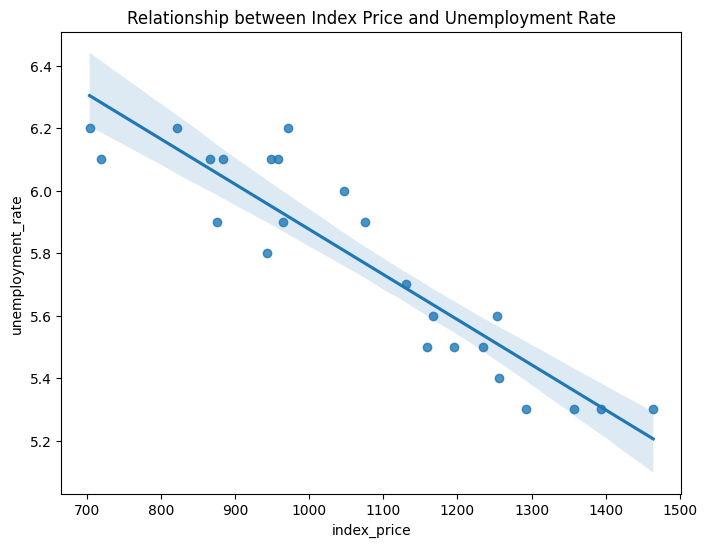

In [70]:
plt.figure(figsize=(8, 6))
sns.regplot(x=df_index['index_price'], y=df_index['unemployment_rate'])
plt.title('Relationship between Index Price and Unemployment Rate')
plt.show()

In [71]:
## Standardizing the data
from sklearn.preprocessing import StandardScaler

In [72]:
scalar = StandardScaler()

In [73]:
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [74]:
X_train

array([[ 0.15426662, -0.90115511,  0.37908503],
       [-1.51181292,  1.31077107, -1.48187786],
       [ 1.26498632, -0.90115511,  1.30956648],
       [-0.95645307,  1.31077107, -0.55139641],
       [-1.37297296,  1.31077107, -1.48187786],
       [ 0.01542666, -0.16384638,  0.68924552],
       [ 0.43194655, -0.90115511,  0.999406  ],
       [-1.23413299,  1.31077107, -1.48187786],
       [-1.09529303,  1.31077107, -1.17171738],
       [ 1.40382628, -0.90115511,  1.30956648],
       [ 0.70962647, -0.90115511,  0.999406  ],
       [ 1.12614636, -0.90115511,  0.37908503],
       [ 1.54266624, -0.90115511,  0.999406  ],
       [-0.67877315,  0.57346234, -0.8615569 ],
       [-0.26225326, -0.16384638, -0.24123593],
       [ 0.29310659, -0.90115511,  0.06892455],
       [ 0.98730639, -0.90115511,  0.999406  ],
       [-0.81761311,  1.31077107, -0.8615569 ]])

In [75]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [76]:
regression.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [77]:
### Cross Validation => To avoid overfitting and underfitting of the model
from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(regression, X_train, y_train, scoring='neg_mean_squared_error', cv=3)

In [88]:
np.mean(validation_score)

np.float64(-1396.534179491835)

In [79]:
### Predicting
y_pred = regression.predict(X_test)

In [80]:
y_pred

array([1167.9658751 ,  927.13485879, 1404.48152868,  874.46856489,
       1073.8835139 , 1140.33811933])

In [ ]:
## Performance metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)

Mean Squared Error: 1058.322772567332
Mean Absolute Error: 24.943214918524347
Root Mean Squared Error: 32.531873179504004


In [84]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
print("R^2 Score:", score)

## Display adjusted r-sqaure
print('Adjusted R^2 Score:', 1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

R^2 Score: 0.9685628025654792
Adjusted R^2 Score: 0.9214070064136981


## Assumptions

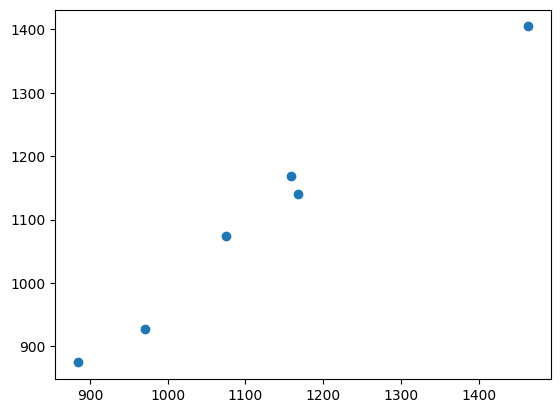

In [85]:
plt.scatter(y_test, y_pred)

In [86]:
resuduals = y_test - y_pred
print(resuduals)

8     -8.965875
16    43.865141
0     59.518471
18     9.531435
11     1.116486
9     26.661881
Name: index_price, dtype: float64


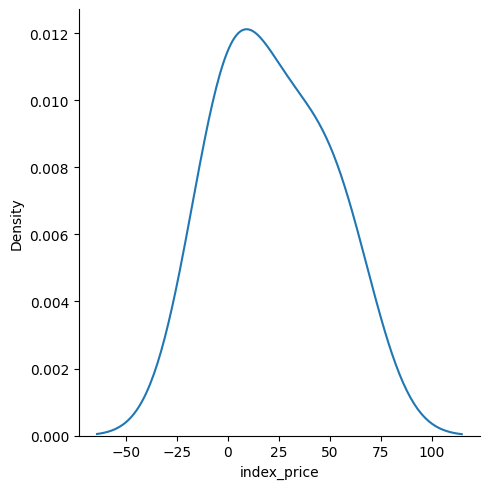

In [87]:
## Plot this residuals
sns.displot(resuduals, kind='kde')

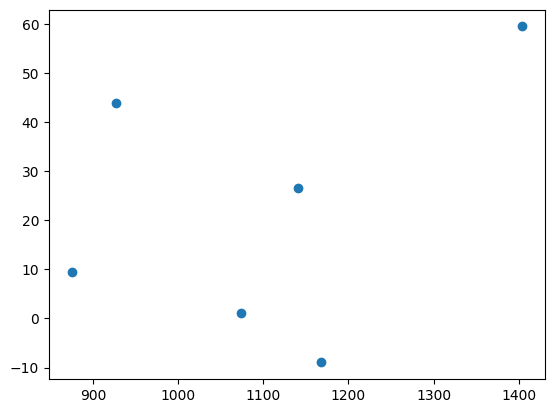

In [89]:
## Scatter plaot with respect to prediction and residuals
plt.scatter(y_pred, resuduals)

In [91]:
### OLS Linear Regression
import statsmodels.api as sm
model = sm.OLS(y_train, X_train).fit()

In [92]:
model.summary()

c:\Users\KIIT0001\anaconda3\envs\ai_ml_env\lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=18 observations were given.
  return hypotest_fun_in(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.038
Model:                            OLS   Adj. R-squared (uncentered):             -0.155
Method:                 Least Squares   F-statistic:                             0.1956
Date:                Wed, 31 Dec 2025   Prob (F-statistic):                       0.898
Time:                        07:05:33   Log-Likelihood:                         -150.83
No. Observations:                  18   AIC:                                      307.7
Df Residuals:                      15   BIC:                                      310.3
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          -192.7736    908.671     -0.212      0.835   -2129.559    1744.012
x2            14.0186    763.784      0.018      0.986   -1613.949    1641.986
x3            -2.7827    864.267     -0.003      0.997   -1844.924    1839.358
==============================================================================
Omnibus:                        0.400   Durbin-Watson:                   0.002
Prob(Omnibus):                  0.819   Jarque-Bera (JB):                0.530
Skew:                          -0.215   Prob(JB):                        0.767
Kurtosis:                       2.278   Cond. No.                         7.04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [93]:
print(regression.coef_)

[-192.77362859   14.01857994   -2.78266445]
